## Packages/Library yang Digunakan

In [41]:
from google.colab import drive
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from xgboost import XGBRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Understanding

In [20]:
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/PRSA_data_2010.1.1-2014.12.31.csv')
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [21]:
# Jumlah baris dan kolom
print(f"Jumlah baris dan kolom: {data.shape}")

# Informasi struktur data
data.info()

Jumlah baris dan kolom: (43824, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [22]:
# Jumlah nilai kosong per kolom
data.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
pm2.5,2067
DEWP,0
TEMP,0
PRES,0
cbwd,0


In [23]:
# Tampilkan semua nama kolom
print(data.columns)

Index(['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES',
       'cbwd', 'Iws', 'Is', 'Ir'],
      dtype='object')


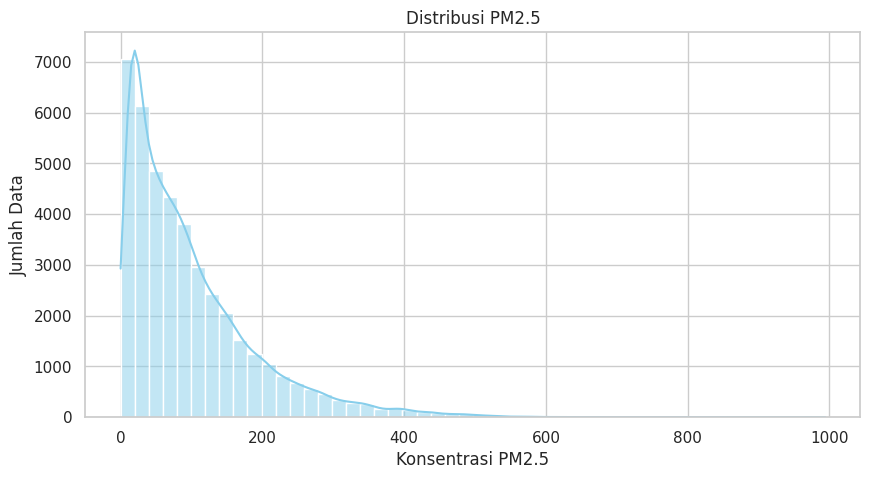

In [24]:
sns.set(style="whitegrid")

# Plot distribusi target (pm2.5)
plt.figure(figsize=(10, 5))
sns.histplot(data['pm2.5'], bins=50, kde=True, color='skyblue')
plt.title('Distribusi PM2.5')
plt.xlabel('Konsentrasi PM2.5')
plt.ylabel('Jumlah Data')
plt.show()

## Data Preparation

### Cleaning Data

In [25]:
# Menghapus baris dengan nilai target (pm2.5) kosong
data = data.dropna(subset=['pm2.5'])

# Cek kembali jumlah missing value
data.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
pm2.5,0
DEWP,0
TEMP,0
PRES,0
cbwd,0


In [26]:
# One-hot encoding untuk fitur kategorikal
data = pd.get_dummies(data, columns=['cbwd'])

In [27]:
# Gabungkan ke dalam kolom datetime
data['datetime'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']])

# Atur datetime sebagai index (opsional untuk analisis waktu)
data.set_index('datetime', inplace=True)

In [28]:
# Pilih fitur yang akan digunakan (selain No, year, month, day, hour)
fitur_model = data.drop(columns=['No', 'year', 'month', 'day', 'hour'])

# Pisahkan antara fitur (X) dan target (y)
X = fitur_model.drop(columns=['pm2.5'])
y = fitur_model['pm2.5']

In [36]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Modelling & Evaluation

In [37]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Inisialisasi dan training
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Prediksi
y_pred_lr = lr_model.predict(X_test)

# Evaluasi
mae = mean_absolute_error(y_test, y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2 = r2_score(y_test, y_pred_lr)

print(f"Linear Regression MAE: {mae:.2f}")
print(f"Linear Regression RMSE: {rmse:.2f}")
print(f"Linear Regression R² Score: {r2:.2f}")

Linear Regression MAE: 57.43
Linear Regression RMSE: 81.04
Linear Regression R² Score: 0.25


In [39]:
# Load data
data = pd.read_csv('/content/drive/MyDrive/PRSA_data_2010.1.1-2014.12.31.csv')

# Drop baris dengan nilai NaN
data = data.dropna()

# Fitur dan target
features = ['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']
X = data[features]
y = data['pm2.5']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi
y_pred_rf = rf_model.predict(X_test)

# Evaluasi
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MAE: {mae_rf:.2f}")
print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest R² Score: {r2_rf:.2f}")

Random Forest MAE: 49.90
Random Forest RMSE: 75.24
Random Forest R² Score: 0.36


In [18]:
# Parameter grid untuk hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi model dan Grid Search
rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# Fit model ke data latih
grid_search.fit(X_train, y_train)

# Model terbaik dari hasil Grid Search
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Prediksi dengan model terbaik
y_pred_rf = best_rf.predict(X_test)

# Evaluasi performa model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Tuned RF MAE: {mae_rf:.2f}")
print(f"Tuned RF RMSE: {rmse_rf:.2f}")
print(f"Tuned RF R² Score: {r2_rf:.2f}")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Tuned RF MAE: 48.70
Tuned RF RMSE: 72.10
Tuned RF R² Score: 0.41


In [33]:
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=10, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost MAE: {mae_xgb:.2f}")
print(f"XGBoost RMSE: {rmse_xgb:.2f}")
print(f"XGBoost R² Score: {r2_xgb:.2f}")

XGBoost MAE: 46.46
XGBoost RMSE: 70.94
XGBoost R² Score: 0.43
